### Solving a regression problem using regression:

In [ ]:
# code for mounting your drive to google collab
from google.colab import drive
import os
drive.mount('/content/drive/')  # collab can access any file from drive now 
# we can also store the models into the drive

In [ ]:
os.getcwd()  # it will give our current working directory

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing=fetch_california_housing()

In [7]:
housing  # data exists into dictionary format

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
housing.keys()  # columns present in the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
# convert the key value pair into dataframe
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
y=pd.DataFrame(housing.target,columns=['target'])

In [13]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
X.shape, y.shape

((20640, 8), (20640, 1))

In [15]:
# we will not use the langitude and longitude columns in our dataset and this will be useful, if we calculate some distance based metrics but this is not the case here.
X.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [16]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [17]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)
# random_state is set so that whatever randomness generated for the split can be reproducable later.

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(11610, 6)
(11610, 1)
(5160, 6)
(5160, 1)
(3870, 6)
(3870, 1)


# Architecture of neural network
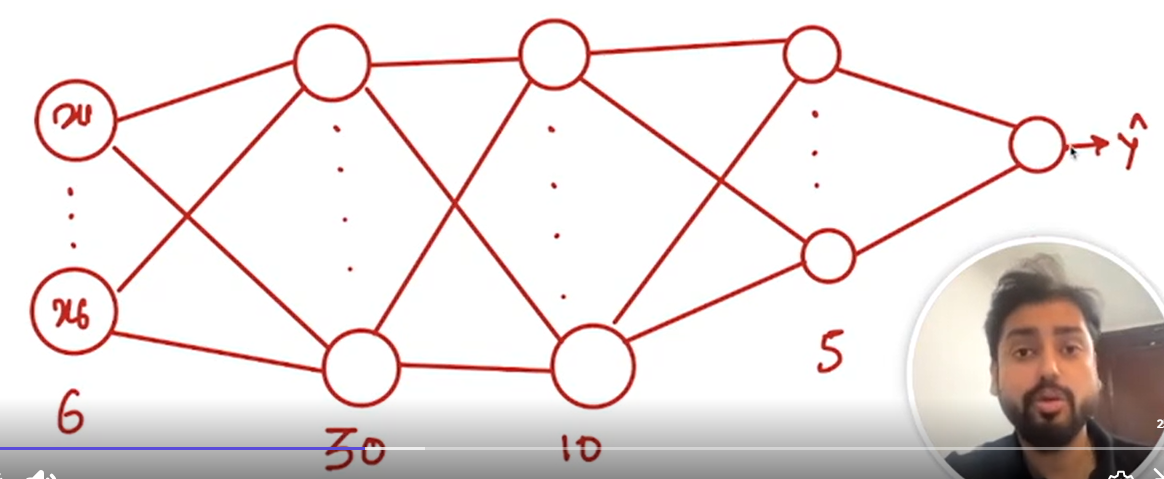

In [19]:
# this is sequential so we don't have to tell the input size in the following layer 
LAYERS=[tf.keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
       tf.keras.layers.Dense(10,activation='relu'),
       tf.keras.layers.Dense(5,activation='relu'),
       tf.keras.layers.Dense(1)]

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model=tf.keras.models.Sequential(LAYERS)

In [21]:
LOSS='mse'
OPTIMIZER='sgd'
model.compile(optimizer=OPTIMIZER,loss=LOSS)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# whenever we want to give data as input into neural network it needs to be scale down because it will not provide any undue advantages to a variables as it is scaled and secondly neural network can learn the wait properly 
scaler=StandardScaler()
# using the same mean and sd calculated and stored in scaler variable we scale the every data 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # so always fit _transform on X_train and transform on X_test,X_validate
X_valid=scaler.transform(X_valid)
# The test and validation data is unseen to us so we can't calculate mean and sd use train data mean and sd for scaling

In [24]:
EPOCHS=20
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2065 - val_loss: 1.2302
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5389 - val_loss: 0.9118
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4888 - val_loss: 1.0056
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4884 - val_loss: 0.4908
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4717 - val_loss: 0.4736
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4508 - val_loss: 0.4784
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4537 - val_loss: 0.4373
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4605 - val_loss: 0.6977
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4433 - val_loss: 0.4598
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4492 - val_loss: 0.4693
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4597 - val_loss: 0.4622
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [25]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.776424,1.230239
1,0.529884,0.911777
2,0.490277,1.005550
3,0.476542,0.490807
4,0.463466,0.473585
5,0.454818,0.478433
6,0.449321,0.437285
7,0.451671,0.697662
8,0.447797,0.459777
9,0.441989,0.469346


<AxesSubplot: >

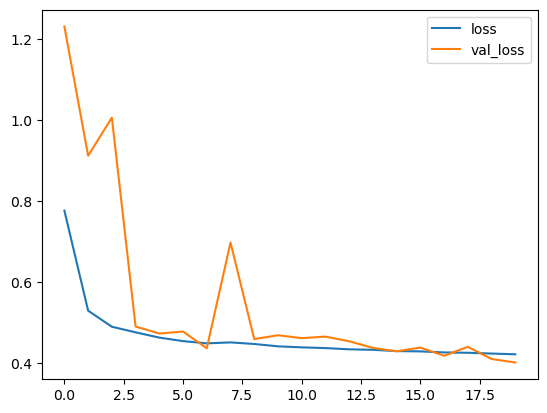

In [26]:
pd.DataFrame(history.history).plot()  # val_loss is very noisy 

In [27]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.4352


0.4281846582889557

In [28]:
X_test.shape

(5160, 6)

In [29]:
# take first data of X_test
new=X_test[0]

In [30]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [31]:
new.shape

(6,)

In [32]:
new.reshape(1,6).shape  # reshape the first data 
# Because the neural network will always take the (no of sample, no of features). So even it is a single sample the form should be same. 

(1, 6)

In [33]:
model.predict(new.reshape(1,6))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[0.7132726]], dtype=float32)

### Model with callbacks:

In [37]:
model2=tf.keras.models.Sequential(LAYERS)
LOSS='mse'
OPTIMIZER=tf.keras.optimizers.SGD(learning_rate=1e-3)
model2.compile(loss=LOSS,optimizer=OPTIMIZER)

EPOCHS=20
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("my_keras_model.keras",save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir="logs") # we want to visualize the logs we have 

CALLBACKS=[checkpoint_cb,early_stopping_cb,tensorboard_cb]

history=model2.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid),callbacks=CALLBACKS)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3905 - val_loss: 0.4082
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4036 - val_loss: 0.4071
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3931 - val_loss: 0.4067
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4094 - val_loss: 0.4095
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4318 - val_loss: 0.4062
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4055 - val_loss: 0.4062
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3973 - val_loss: 0.4084
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4231 - val_loss: 0.4051
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4171 - val_loss: 0.4079
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4074 - val_loss: 0.4066
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4145 - val_loss: 0.4081
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [39]:
# !rm -rf logs    # use to remove the logs
%reload_ext tensorboard

In [40]:
%tensorboard --logdir=='logs'
# iteration means the number of forward propagation and backward propagation we do.

In [41]:
model2.predict(new.reshape(1,6))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0.7745933]], dtype=float32)